<a href="https://colab.research.google.com/github/fabriciocovalesci/tcc_predict_crypto/blob/main/model_predict/predict_crypto/EDA/correlation/correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##   <center>**Criando DataFrame de correlação entre as criptomoedas** </center>

#### **Correlação**: 
O coeficiente de correlação de Pearson (r) ou coeficiente de correlação
produto-momento ou o r de Pearson mede o grau da correlação linear entre
duas variáveis quantitativas. É um índice adimensional com valores situados
ente -1,0 e 1.0 inclusive, que reflete a intensidade de uma relação linear entre
dois conjuntos de dados. 

*Este coeficiente, normalmente representado por **ρ** assume apenas valores entre -1 e 1.*



*   ***ρ = 1***  -  Significa uma correlação perfeita positiva entre as duas variáveis.
*   ***ρ = -1*** -  Significa uma correlação negativa perfeita entre as duas variáveis - Isto é, se uma aumenta, a outra sempre diminui.
*   ***ρ = 0***  - Significa que as duas variáveis não dependem linearmente uma da outra. No entanto, pode existir uma dependência não linear. Assim, o resultado ***ρ = 0*** deve ser investigado por outros meios.


Interpretando ***ρ***


*   0.9 para mais ou para menos indica uma correlação muito forte.
*   0.7 a 0.9 positivo ou negativo indica uma correlação forte.
*   0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
*   0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
*   0 a 0.3 positivo ou negativo indica uma correlação desprezível.


- Instalar dependencia **yfinance** para fazer o download dos dados

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 7.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


- Importar as libs para manipulação dos dados

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import yfinance as yf

- Importar as libs para Plotar os gráficos

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('ggplot')
%matplotlib inline

- Importar as libs nativas do python

In [ ]:
from functools import reduce
from datetime import datetime

- Definir data inicial e data final para buscar os dados no **yfinance**




In [ ]:
today = datetime.strftime(datetime.today(), '%Y-%m-%d')
date_init = "2014-01-01"

- Definir uma lista com as criptomoedas 
- Criado uma função para buscar os dados,  e filtrar somente o preço do Fechamento

In [ ]:
list_tickers = ["BTC-USD", "ETH-USD", "SOL-USD", "BNB-USD", "ADA-USD", "DAI-USD", "DOGE-USD", "DOT-USD", "MATIC-USD", "XRP-USD"]

def download_tickers(ticker):
  try:
    asset = yf.download(ticker, start=date_init, end=today, interval='1d')
    return asset.Close
  except Exception as err:
    print(f"ERROR: {err}")

  
def create_data_frame(asset_close, ticker):
  return pd.DataFrame(asset_close).rename(columns = {'Close': ticker})


- Download dos dados e agrupar numa lista auxiliar

In [ ]:
dfs = []
for ticker in list_tickers:
  asset = download_tickers(ticker)
  dfs.append(create_data_frame(asset, ticker.split('-')[0]))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


- Fazer um merge da atravez da lib pandas, retornando um dataframe final

In [ ]:
df_final = reduce(lambda left,right: pd.merge(left, right, on = 'Date', how = 'inner'), dfs)

- Verificando se há dados nulos no dataframe

In [ ]:
df_final.isnull().sum()

BTC      0
ETH      0
SOL      0
BNB      0
ADA      0
DAI      0
DOGE     0
DOT      0
MATIC    0
XRP      0
dtype: int64

- Exibir matriz de correlação entre as criptomoedas

In [ ]:
df_final.corr()

,BTC,ETH,SOL,BNB,ADA,DAI,DOGE,DOT,MATIC,XRP
BTC,1.000000,0.827272,0.620454,0.774642,0.797066,-0.425659,0.623059,0.945502,0.548566,0.782717
ETH,0.827272,1.000000,0.876107,0.929535,0.841099,-0.460303,0.753872,0.781680,0.875225,0.805608
SOL,0.620454,0.876107,1.000000,0.771213,0.674257,-0.318159,0.482113,0.618574,0.819587,0.597805
BNB,0.774642,0.929535,0.771213,1.000000,0.779030,-0.476482,0.772891,0.742284,0.829902,0.820299
ADA,0.797066,0.841099,0.674257,0.779030,1.000000,-0.350306,0.813340,0.814600,0.680321,0.842530
DAI,-0.425659,-0.460303,-0.318159,-0.476482,-0.350306,1.000000,-0.323086,-0.287741,-0.416622,-0.319529
DOGE,0.623059,0.753872,0.482113,0.772891,0.813340,-0.323086,1.000000,0.645207,0.647772,0.854366
DOT,0.945502,0.781680,0.618574,0.742284,0.814600,-0.287741,0.645207,1.000000,0.500607,0.799237
MATIC,0.548566,0.875225,0.819587,0.829902,0.680321,-0.416622,0.647772,0.500607,1.000000,0.618009
XRP,0.782717,0.805608,0.597805,0.820299,0.842530,-0.319529,0.854366,0.799237,0.618009,1.000000


- Visualizar a matriz de correlação


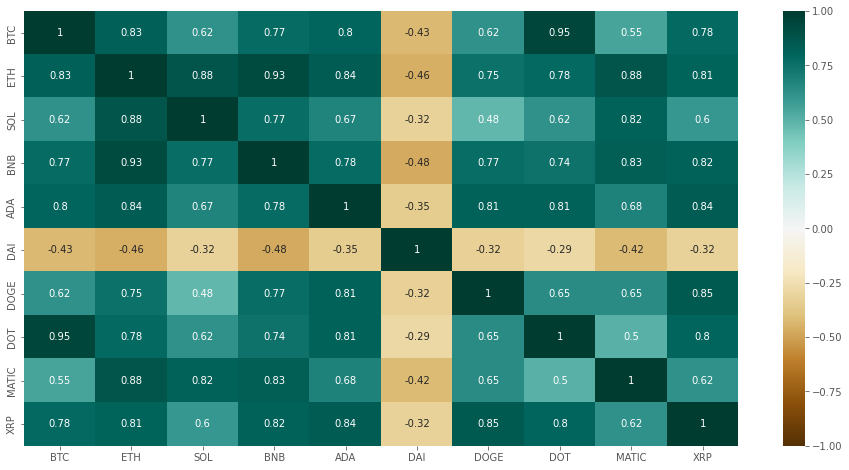

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(df_final.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

- Exportar matriz de correlação para JSON

In [ ]:
df_final.corr().to_json()

'{"BTC":{"BTC":1.0,"ETH":0.8272717807,"SOL":0.6204544794,"BNB":0.774642205,"ADA":0.7970664389,"DAI":-0.425659409,"DOGE":0.6230585628,"DOT":0.9455022746,"MATIC":0.5485657926,"XRP":0.7827166421},"ETH":{"BTC":0.8272717807,"ETH":1.0,"SOL":0.8761068993,"BNB":0.929535177,"ADA":0.8410991069,"DAI":-0.4603034638,"DOGE":0.7538721285,"DOT":0.7816804201,"MATIC":0.8752254043,"XRP":0.8056075245},"SOL":{"BTC":0.6204544794,"ETH":0.8761068993,"SOL":1.0,"BNB":0.7712130069,"ADA":0.674257057,"DAI":-0.3181593282,"DOGE":0.4821125726,"DOT":0.6185742296,"MATIC":0.8195865508,"XRP":0.5978051399},"BNB":{"BTC":0.774642205,"ETH":0.929535177,"SOL":0.7712130069,"BNB":1.0,"ADA":0.7790298183,"DAI":-0.4764819545,"DOGE":0.7728905402,"DOT":0.7422842048,"MATIC":0.8299020421,"XRP":0.8202989467},"ADA":{"BTC":0.7970664389,"ETH":0.8410991069,"SOL":0.674257057,"BNB":0.7790298183,"ADA":1.0,"DAI":-0.3503057018,"DOGE":0.8133396334,"DOT":0.8145996692,"MATIC":0.6803206282,"XRP":0.8425300085},"DAI":{"BTC":-0.425659409,"ETH":-0.46030